In [1]:
import pandas as pd
import geopandas
import re

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import datetime


In [2]:
def convert_to_coordinates(item):
    return [float(x) for x in item.split('[')[-1].split(']')[0].split(', ')]

def convert_to_datetime(item):
    y = re.split(r'(-|:)', item)
    return datetime.datetime(int(y[0]), int(y[2]), int(y[4][:2]), int(y[-3])%24, int(y[-1])%60)


df_bici = pd.read_csv('bicimad_trips.csv', low_memory=False)
df_bici['geolocation_unlock'] = df_bici['geolocation_unlock'].apply(convert_to_coordinates)
df_bici['unlock_date'] = df_bici['unlock_date'].apply(convert_to_datetime);


In [3]:
df_bici.head()

,Unnamed: 0,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
0,0,2022-01-01,1718.0,1.0,16.28,"[-3.6714166, 40.4318611]",NaN,2022-01-01 02:20:00,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688398, 4...",NaN,2022-01-01T00:18:37,200.0,3.0,Avenida de los Toreros,64.0,4.0,Plaza de la Independencia
1,1,2022-01-01,7340.0,1.0,7.10,"[-3.6894193, 40.4166834]",NaN,2022-01-01 07:53:00,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6993465, ...",NaN,2022-01-01T00:14:59,69.0,5.0,Antonio Maura,169.0,17.0,Manuel Silvela
2,2,2022-01-01,3861.0,1.0,0.48,"[-3.688822, 40.409808]",NaN,2022-01-01 09:21:00,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688822, 4...",NaN,2022-01-01T00:09:50,73.0,21.0,Puerta del Ángel Caído,73.0,21.0,Puerta del Ángel Caído
3,3,2022-01-01,7657.0,1.0,6.62,"[-3.6653055, 40.426]",NaN,2022-01-01 09:52:00,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6657777, ...",NaN,2022-01-01T00:16:29,192.0,22.0,Marqués de Zafra,190.0,17.0,Parque Roma
4,4,2022-01-01,6653.0,1.0,8.07,"[-3.6983055, 40.3962222]",NaN,2022-01-01 09:57:00,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7025024, ...",NaN,2022-01-01T00:18:01,183.0,3.0,Jaime el Conquistador,47.0,24.0,Jesús y María


In [4]:
df_weather = pd.read_csv('weather.csv')
df_weather = df_weather.set_index('date')

df_weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
2022-01-01,10.1,5.5,16.7,0.0,NaN,21.0,6.1,NaN,1028.6,NaN
2022-01-02,9.5,5.1,14.5,0.0,NaN,33.0,4.6,NaN,1029.7,NaN
2022-01-03,9.1,5.6,13.8,0.0,NaN,235.0,5.6,NaN,1026.7,NaN
2022-01-04,7.4,5.2,12.1,7.3,NaN,232.0,14.2,NaN,1016.4,NaN
2022-01-05,5.9,4.3,8.9,5.0,NaN,290.0,14.0,NaN,1019.5,NaN


In [5]:
df = pd.DataFrame()
df['datetime'] = df_bici['unlock_date']
df['locktype'] = df_bici['locktype']
df['loc'] = df_bici['geolocation_unlock']
df['loc_x'] = df_bici['geolocation_unlock'].apply(lambda x:x[0])
df['loc_y'] = df_bici['geolocation_unlock'].apply(lambda x:x[1])
df['unlock_station_name'] = df_bici['unlock_station_name']
df['weekday'] = df['datetime'].apply(lambda x:x.weekday())
df['month'] = df['datetime'].apply(lambda x:x.month)

df['tavg'] = df['datetime'].apply(lambda x:df_weather.loc[x.strftime('%Y-%m-%d')]['tavg'])
df['prcp'] = df['datetime'].apply(lambda x:df_weather.loc[x.strftime('%Y-%m-%d')]['prcp'])
df['wspd'] = df['datetime'].apply(lambda x:df_weather.loc[x.strftime('%Y-%m-%d')]['wspd'])
df['unlock_station_name'] = df['unlock_station_name'].fillna('None')
df['day_number'] = df['datetime'].apply(lambda x: x.strftime('%j'))
df.head()

,datetime,locktype,loc,loc_x,loc_y,unlock_station_name,weekday,month,tavg,prcp,wspd,day_number
0,2022-01-01 02:20:00,STATION,"[-3.6714166, 40.4318611]",-3.671417,40.431861,Avenida de los Toreros,5,1,10.1,0.0,6.1,001
1,2022-01-01 07:53:00,STATION,"[-3.6894193, 40.4166834]",-3.689419,40.416683,Antonio Maura,5,1,10.1,0.0,6.1,001
2,2022-01-01 09:21:00,STATION,"[-3.688822, 40.409808]",-3.688822,40.409808,Puerta del Ángel Caído,5,1,10.1,0.0,6.1,001
3,2022-01-01 09:52:00,STATION,"[-3.6653055, 40.426]",-3.665306,40.426000,Marqués de Zafra,5,1,10.1,0.0,6.1,001
4,2022-01-01 09:57:00,STATION,"[-3.6983055, 40.3962222]",-3.698306,40.396222,Jaime el Conquistador,5,1,10.1,0.0,6.1,001


In [6]:
df.head()

,datetime,locktype,loc,loc_x,loc_y,unlock_station_name,weekday,month,tavg,prcp,wspd,day_number
0,2022-01-01 02:20:00,STATION,"[-3.6714166, 40.4318611]",-3.671417,40.431861,Avenida de los Toreros,5,1,10.1,0.0,6.1,001
1,2022-01-01 07:53:00,STATION,"[-3.6894193, 40.4166834]",-3.689419,40.416683,Antonio Maura,5,1,10.1,0.0,6.1,001
2,2022-01-01 09:21:00,STATION,"[-3.688822, 40.409808]",-3.688822,40.409808,Puerta del Ángel Caído,5,1,10.1,0.0,6.1,001
3,2022-01-01 09:52:00,STATION,"[-3.6653055, 40.426]",-3.665306,40.426000,Marqués de Zafra,5,1,10.1,0.0,6.1,001
4,2022-01-01 09:57:00,STATION,"[-3.6983055, 40.3962222]",-3.698306,40.396222,Jaime el Conquistador,5,1,10.1,0.0,6.1,001


In [7]:
df_temp = df.groupby('unlock_station_name').size().sort_values()
df_temp = df_temp.reset_index()
#plt.figure()
#plt.plot(np.arange(len(df_temp)), df_temp[0],'o-')
df_temp['unlock_station_name'].apply(str)
df_temp['rank_station'] = pd.qcut(df_temp[0], 10, labels=np.arange(1,11))
df_temp = df_temp.set_index('unlock_station_name')
df_temp

df['rank_station'] = df['unlock_station_name'].apply(lambda x:df_temp.loc[x]['rank_station'])
df.head()

,datetime,locktype,loc,loc_x,loc_y,unlock_station_name,weekday,month,tavg,prcp,wspd,day_number,rank_station
0,2022-01-01 02:20:00,STATION,"[-3.6714166, 40.4318611]",-3.671417,40.431861,Avenida de los Toreros,5,1,10.1,0.0,6.1,001,3
1,2022-01-01 07:53:00,STATION,"[-3.6894193, 40.4166834]",-3.689419,40.416683,Antonio Maura,5,1,10.1,0.0,6.1,001,3
2,2022-01-01 09:21:00,STATION,"[-3.688822, 40.409808]",-3.688822,40.409808,Puerta del Ángel Caído,5,1,10.1,0.0,6.1,001,4
3,2022-01-01 09:52:00,STATION,"[-3.6653055, 40.426]",-3.665306,40.426000,Marqués de Zafra,5,1,10.1,0.0,6.1,001,3
4,2022-01-01 09:57:00,STATION,"[-3.6983055, 40.3962222]",-3.698306,40.396222,Jaime el Conquistador,5,1,10.1,0.0,6.1,001,4


In [9]:
features = ['loc_x', 'loc_y', 'weekday', 'month', 'tavg', 'prcp', 'wspd', 'rank_station']
df_final = df.groupby(['day_number', 'unlock_station_name'], as_index=False)[features].mean()
df_final['num_rentals'] = df.groupby(['day_number', 'unlock_station_name'], as_index=False).size()['size']
df_final.interpolate(inplace=True)
df_final['season'] = df_final['month'].apply(lambda x:int(x//3))



/var/folders/m1/s_4m97wj39bdb0744dj4wxyh0000gn/T/ipykernel_76834/389481291.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_final.interpolate(inplace=True)


In [15]:
gdf_Madrid = geopandas.read_file('Spain_shapefile/Madrid_ETRS89.shp')

gdf_data = geopandas.GeoDataFrame(
    df_final, geometry=geopandas.points_from_xy(df_final.loc_x, df_final.loc_y), crs="EPSG:4326")

df_final['is_Madrid'] = gdf_data['geometry'].apply(lambda x: x.within(gdf_Madrid['geometry'].iloc[0]))
# Drop rows where location does not match Madrid
df_final = df_final[df_final['is_Madrid']]
df_final.head()

/Users/christianliedl/anaconda3/envs/mlbasic/lib/python3.10/site-packages/geopandas/geoseries.py:574: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


,day_number,unlock_station_name,loc_x,loc_y,weekday,month,tavg,prcp,wspd,rank_station,num_rentals,season,is_Madrid
0,001,142 - Castellana 42,-3.687915,40.433409,5.0,1.0,10.1,0.0,6.1,7.0,1,0,True
1,001,27 - Huertas,-3.695618,40.413280,5.0,1.0,10.1,0.0,6.1,10.0,1,0,True
2,001,55 - Plaza de San Ildefonso,-3.702084,40.423976,5.0,1.0,10.1,0.0,6.1,10.0,1,0,True
3,001,Agustín de Betancourt,-3.695605,40.444030,5.0,1.0,10.1,0.0,6.1,3.0,4,0,True
4,001,Alberto Alcocer,-3.684715,40.458532,5.0,1.0,10.1,0.0,6.1,1.0,4,0,True


In [16]:
df_final.to_csv('data_processed.csv')

<IPython.core.display.Javascript object>


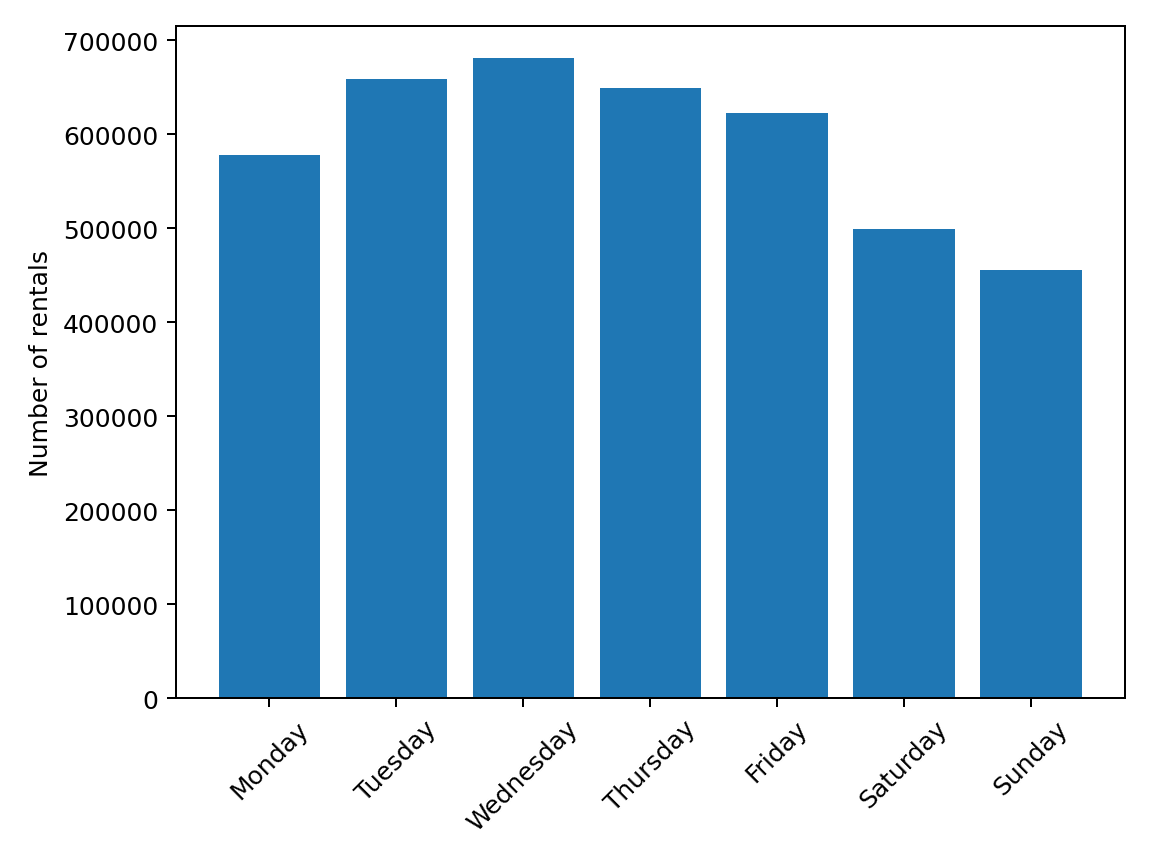

<IPython.core.display.Javascript object>


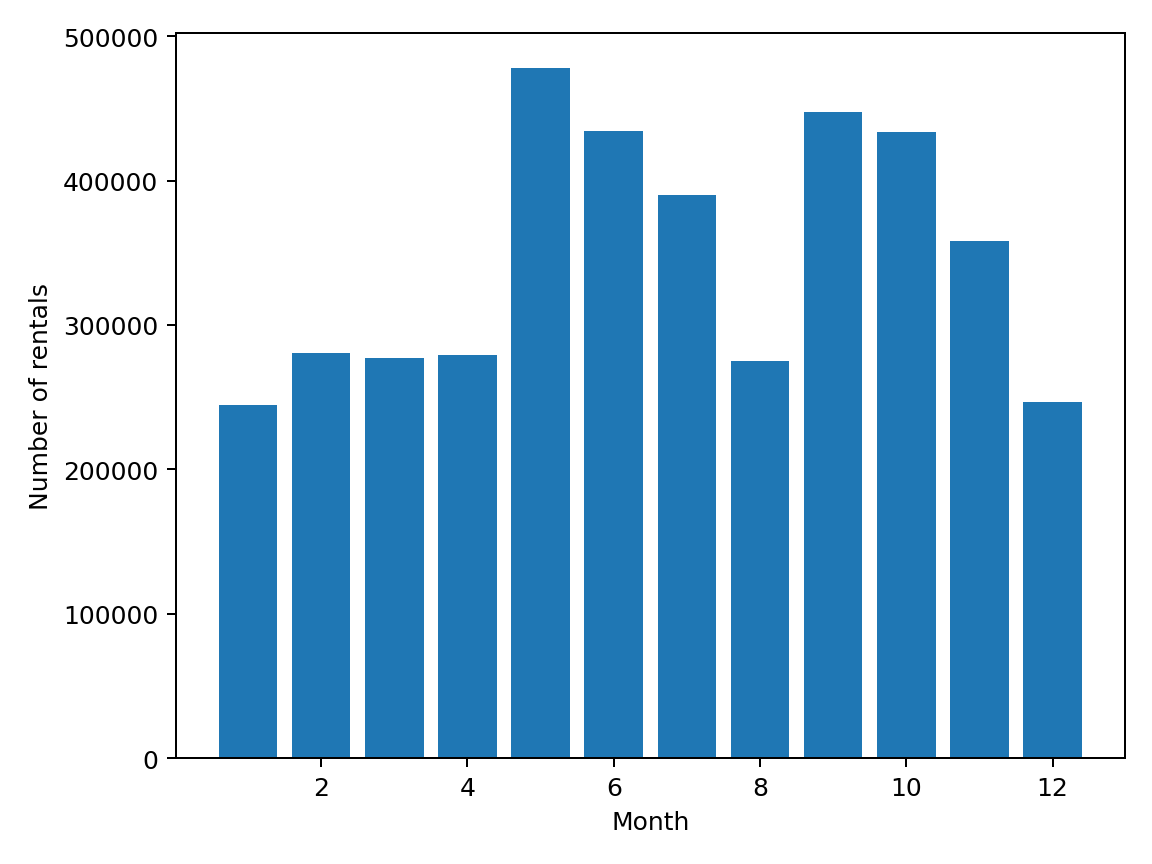

<IPython.core.display.Javascript object>


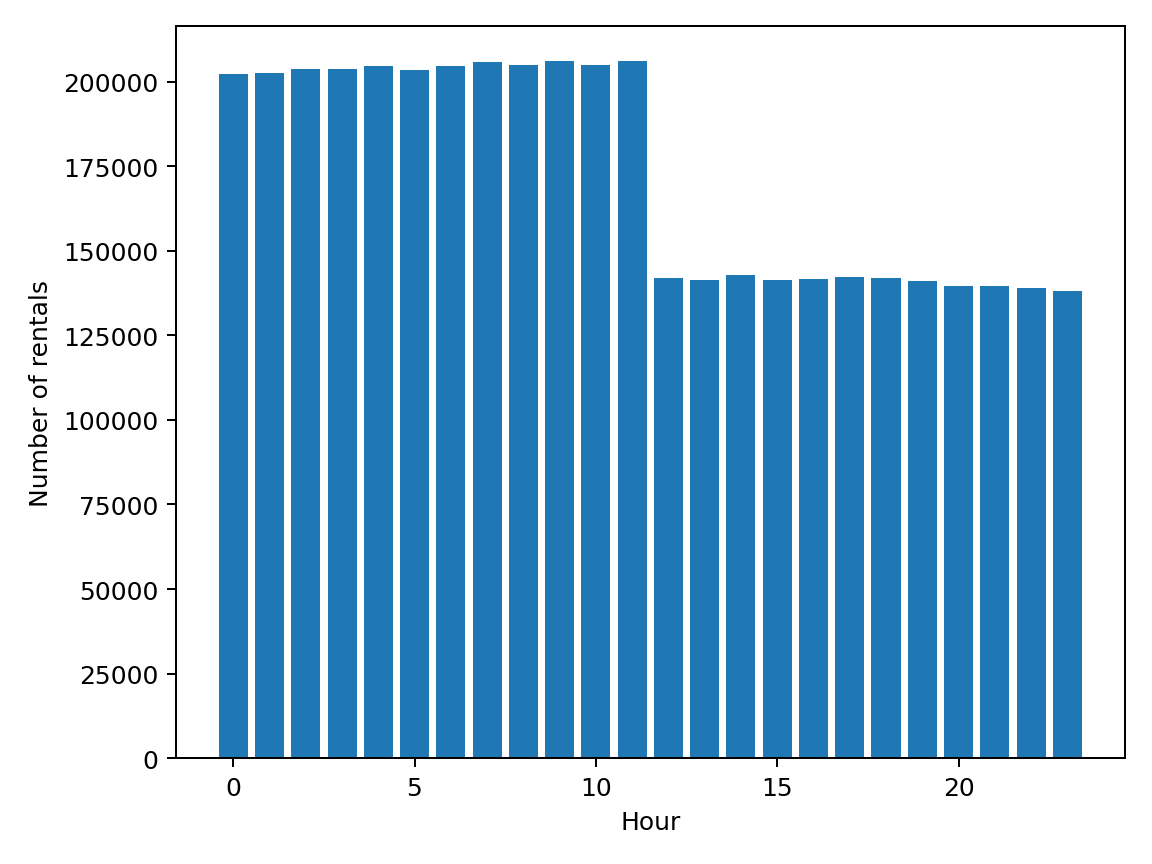

In [160]:
x = df_clean.groupby('weekday').size().index
y = df_clean.groupby('weekday').size().values

plt.figure()
plt.bar(x, y)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylabel('Number of rentals')
plt.tight_layout()


x = df_clean.groupby('month').size().index
y = df_clean.groupby('month').size().values

plt.figure()
plt.bar(x, y)
plt.ylabel('Number of rentals')
plt.xlabel('Month')
plt.tight_layout()


x = df_clean.groupby('hour').size().index
y = df_clean.groupby('hour').size().values

plt.figure()
plt.bar(x, y)
plt.ylabel('Number of rentals')
plt.xlabel('Hour')
plt.tight_layout()



In [ ]:
df_temp = df[df['unlocktype']=='STATION']['geolocation_unlock']

madrid_shape.plot()
for i in range(1000):
    coordinate = df_temp.iloc[i]
    plt.plot(coordinate[0], coordinate[1], '.', ms=2, color='black')
    
plt.xlim([-3.74, -3.625])
plt.ylim([40.38, 40.475])

<IPython.core.display.Javascript object>


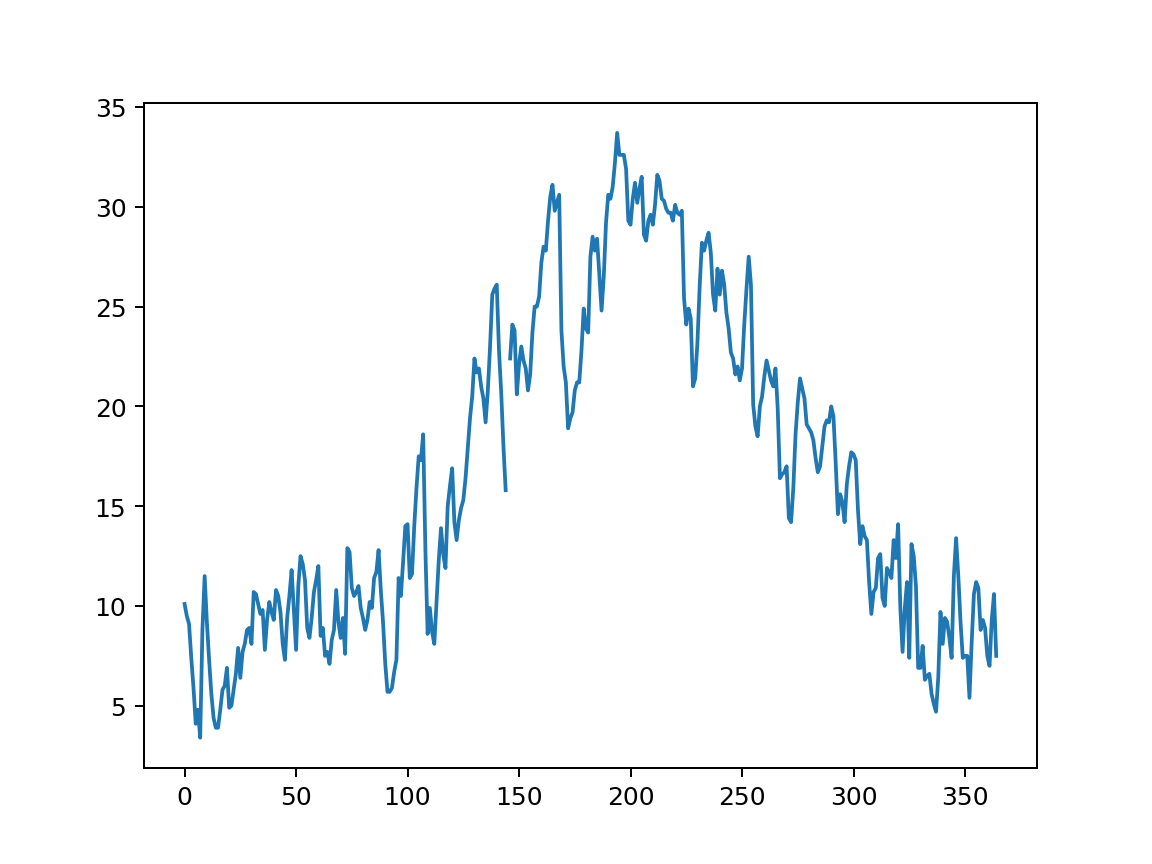

In [231]:
plt.figure()
plt.plot(df_weather['tavg'], color='tab:blue')


In [448]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [475]:
df_train = df_final[df_final['month']<12]
df_test = df_final[df_final['month']==12]


features = ['weekday', 'month', 'tavg', 'prcp', 'wspd', 'loc_x', 'loc_y']
target = 'num_rentals'

In [ ]:
model = XGBRegressorXGBRegressor()

model.fit(df_train[features], df_train[target])

y_pred_test = model.predict(df_test[features])


In [ ]:
from sklearn import metrics 

mse = metrics.mean_squared_error(df_test[target], y_pred_test)/(np.mean(df_tr[target])**2)
mae = metrics.mean_absolute_error(df_test[target], y_pred_test)/(np.mean(df_tr[target]))
r2 = metrics.r2_score(df_test[target], y_pred_test)
print(mse, mae, r2)